In [7]:
import sys
import os

In [8]:
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)


In [9]:
from scripts.utils import *

In [10]:
dfs = load_data(file_paths)
togo_data = dfs['Togo']
togo_data.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [11]:
togo_data = convert_timestamp(togo_data)
print(f"Togo dataframe 'Timestamp' dtype: {togo_data['Timestamp'].dtype}")
togo_data.set_index('Timestamp', inplace=True)

Togo dataframe 'Timestamp' dtype: datetime64[ns]


### summary statistics
datatype, mean, median, standard deviation, and other statistical measures for each numeric column to understand data distribution.

In [12]:
print(togo_data.info())
print(togo_data.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-10-25 00:01:00 to 2022-10-25 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          525600 non-null  float64


##  Check for Missing Values and Outliers
Look for missing values, outliers, or incorrect entries(negative values)

In [13]:
data_check({'Togo': togo_data})


Data Quality Check for Togo:
Missing Values: 525600
Comments    525600
dtype: int64

Negative values in GHI:
Number of negative values: 257385

Outliers in GHI:
Number of outliers: 1303
Percentage of outliers: 0.25%

Outliers in DNI:
Number of outliers: 50586
Percentage of outliers: 9.62%

Outliers in DHI:
Number of outliers: 7905
Percentage of outliers: 1.50%

Outliers in ModA:
Number of outliers: 1237
Percentage of outliers: 0.24%

Outliers in ModB:
Number of outliers: 1537
Percentage of outliers: 0.29%

Outliers in WS:
Number of outliers: 8708
Percentage of outliers: 1.66%

Outliers in WSgust:
Number of outliers: 7377
Percentage of outliers: 1.40%

Outliers in WSstdev:
Number of outliers: 14669
Percentage of outliers: 2.79%

Outliers in WDstdev:
Number of outliers: 6921
Percentage of outliers: 1.32%

Outliers in BP:
Number of outliers: 19228
Percentage of outliers: 3.66%

Outliers in Cleaning:
Number of outliers: 281
Percentage of outliers: 0.05%

Outliers in Precipitation:
Number 

### Handle the negative values in GHI, DNI and DHI

In [14]:
togo_data = handle_negative_values(dfs['Togo'], 'Togo')


Handling negative values for Togo:
  Found 257385 negative values in GHI
  Replaced negative values with 0 in GHI
  No negative values found in DNI
  No negative values found in DHI


### Time Series Analysis for 'GHI', 'DNI', 'DHI', and 'Tamb'
multivariate - time series to observe patterns by month, trends throughout day, or anomalies

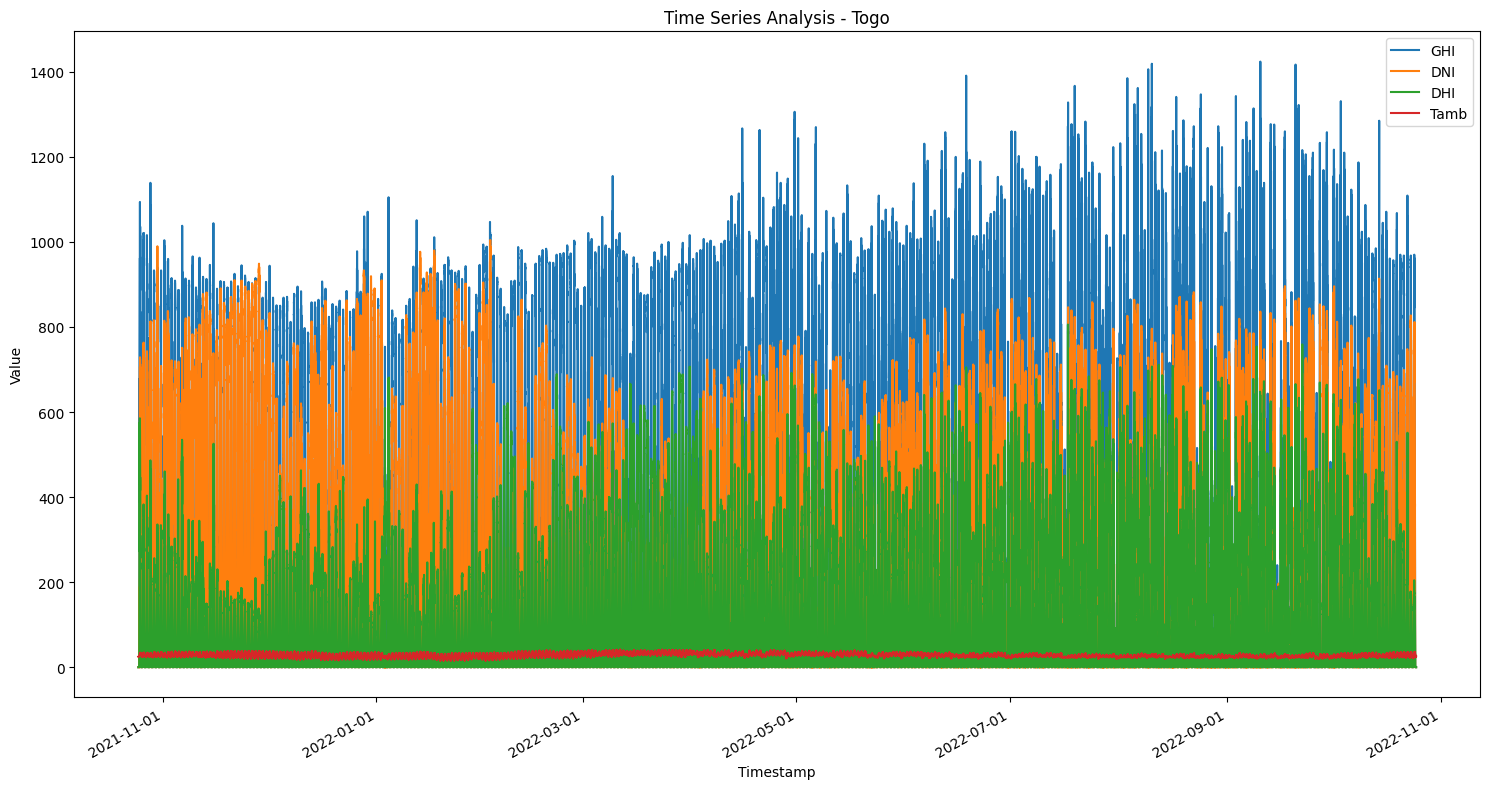

In [15]:
columns_to_plot = ['GHI', 'DNI', 'DHI', 'Tamb']

time_series({'Togo': togo_data}, columns_to_plot)

### Time Series Analysis for 'Cleaning', 'ModA', 'ModB'
multivariate - evaluate the impact of cleaning (using the 'Cleaning' column)

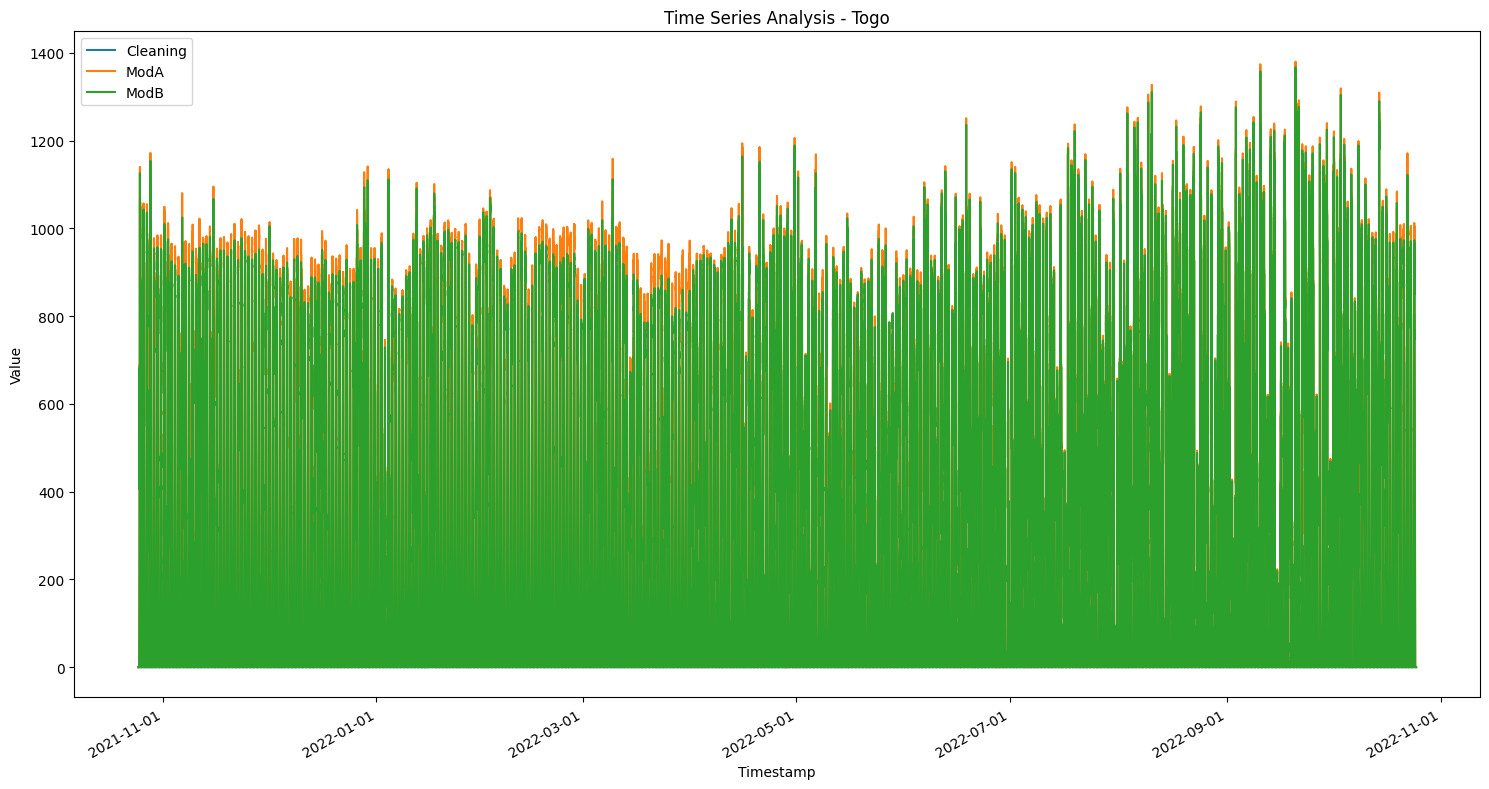

In [16]:
columns_to_plot = ['Cleaning', 'ModA', 'ModB']
plot_time_series_combined({'Togo': togo_data}, columns_to_plot)

### Correlation Analysis
correlations between solar radiation components (GHI, DNI, DHI) and temperature measures

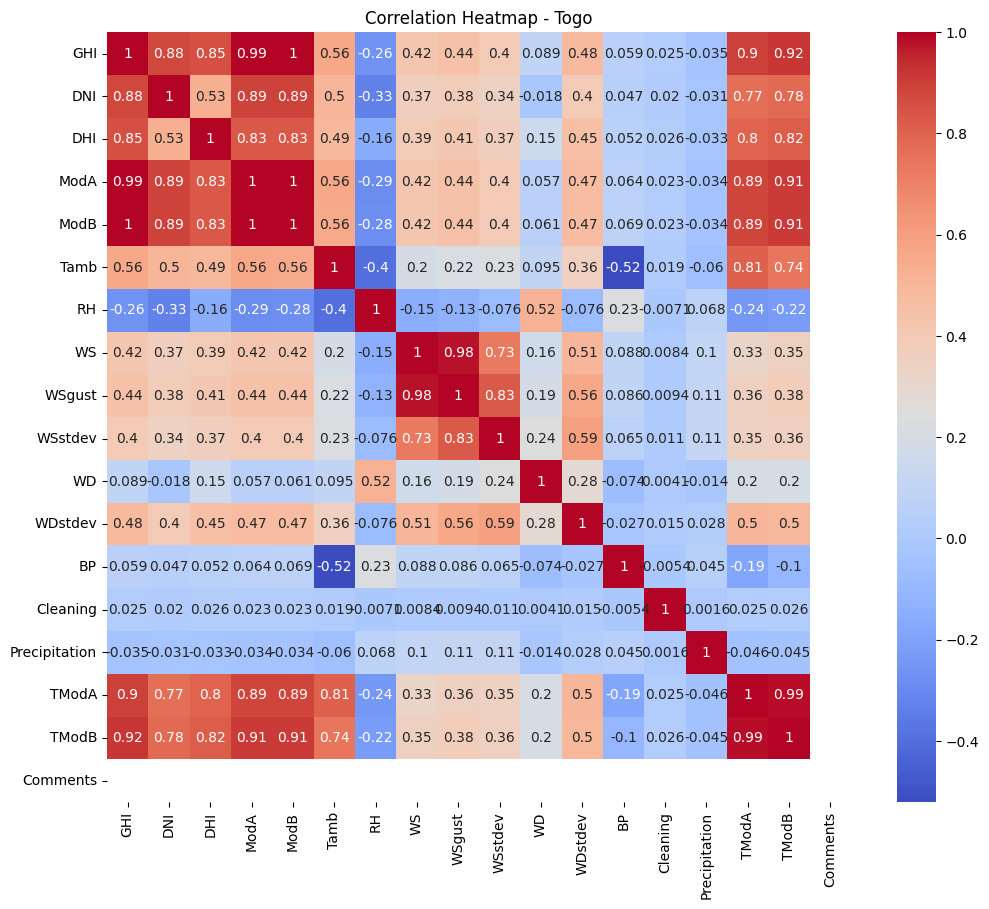

In [17]:
plot_correlation_heatmap(togo_data, 'Togo')

### Wind Analysis 
distribution of wind speed and direction

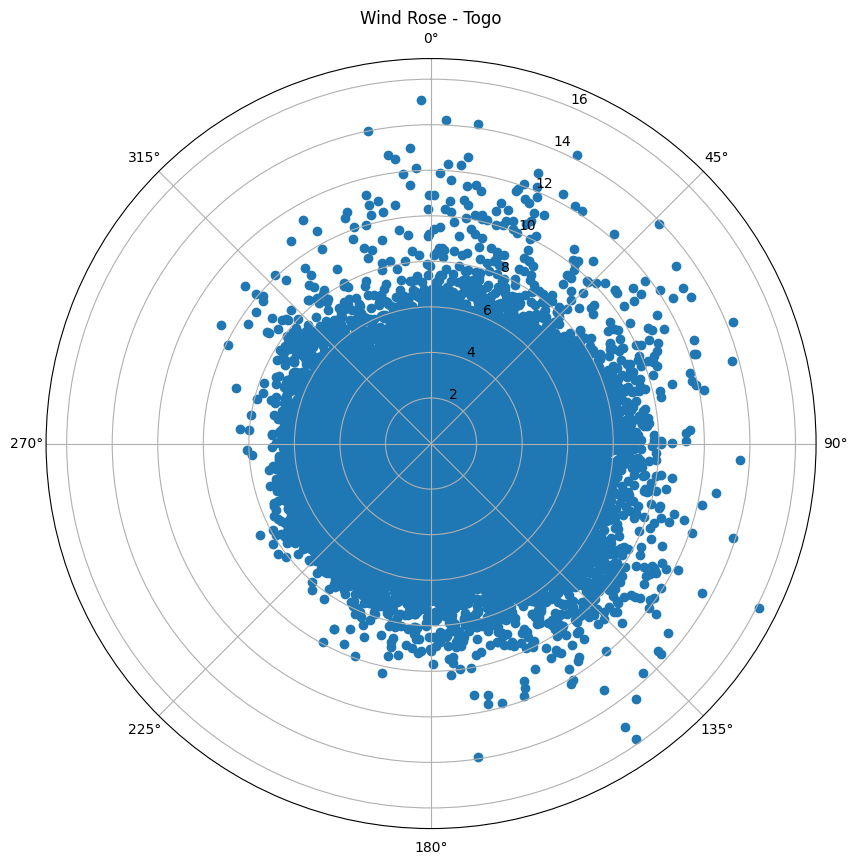

In [18]:
plot_wind_rose(togo_data, 'Togo')

### Histogram 
histograms to visualize the frequency distribution of variables GHI, DNI, DHI, WS, and Tamb

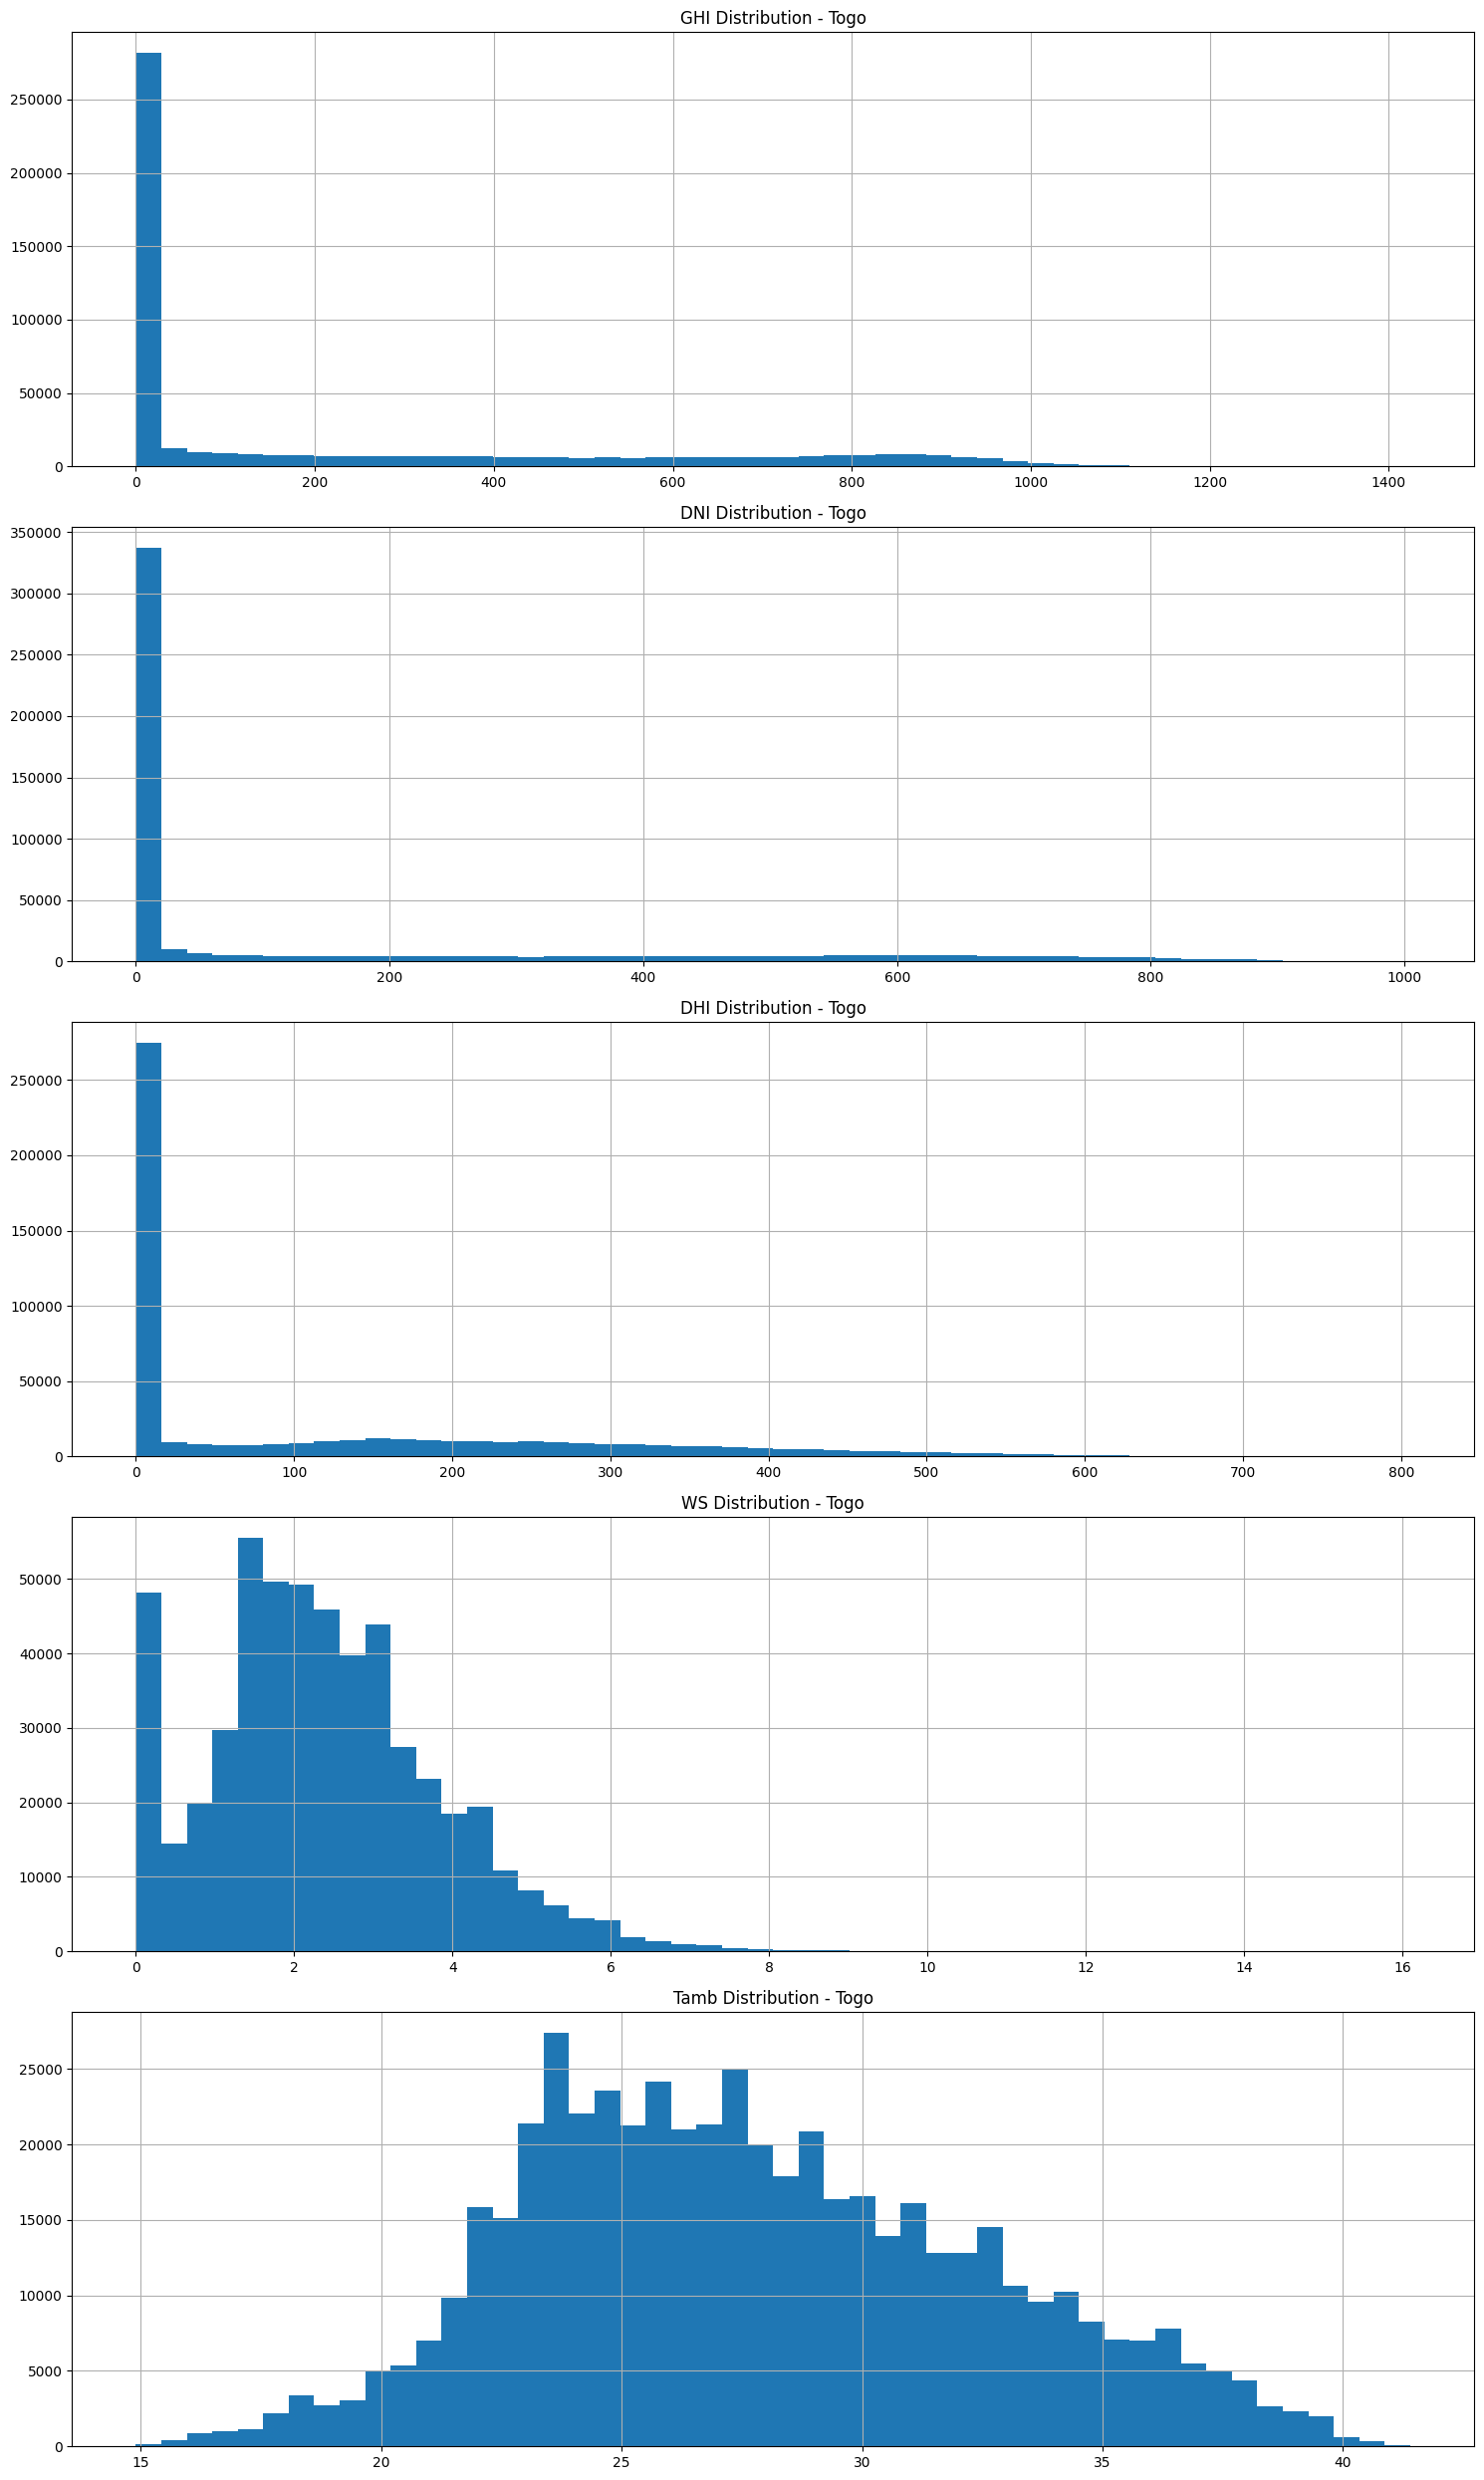

In [19]:
plot_histograms(togo_data, ['GHI', 'DNI', 'DHI', 'WS', 'Tamb'], 'Togo')

### Z Score Analysis 
Z-scores to flag outliers with z-threshold of 3


Outliers for Togo (|z-score| > 3):
GHI               314
DNI              1062
DHI              3415
ModA              137
ModB              206
Tamb                0
RH                  0
WS               3510
WSgust           3915
WSstdev          5753
WD                  0
WDstdev          3362
BP               1019
Cleaning          281
Precipitation    3338
TModA             153
TModB             609
Comments            0
dtype: int64


d:\KIFYA AIM\chala\final\MoonLight-Energy-Solutions-\scripts\utils.py:195: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


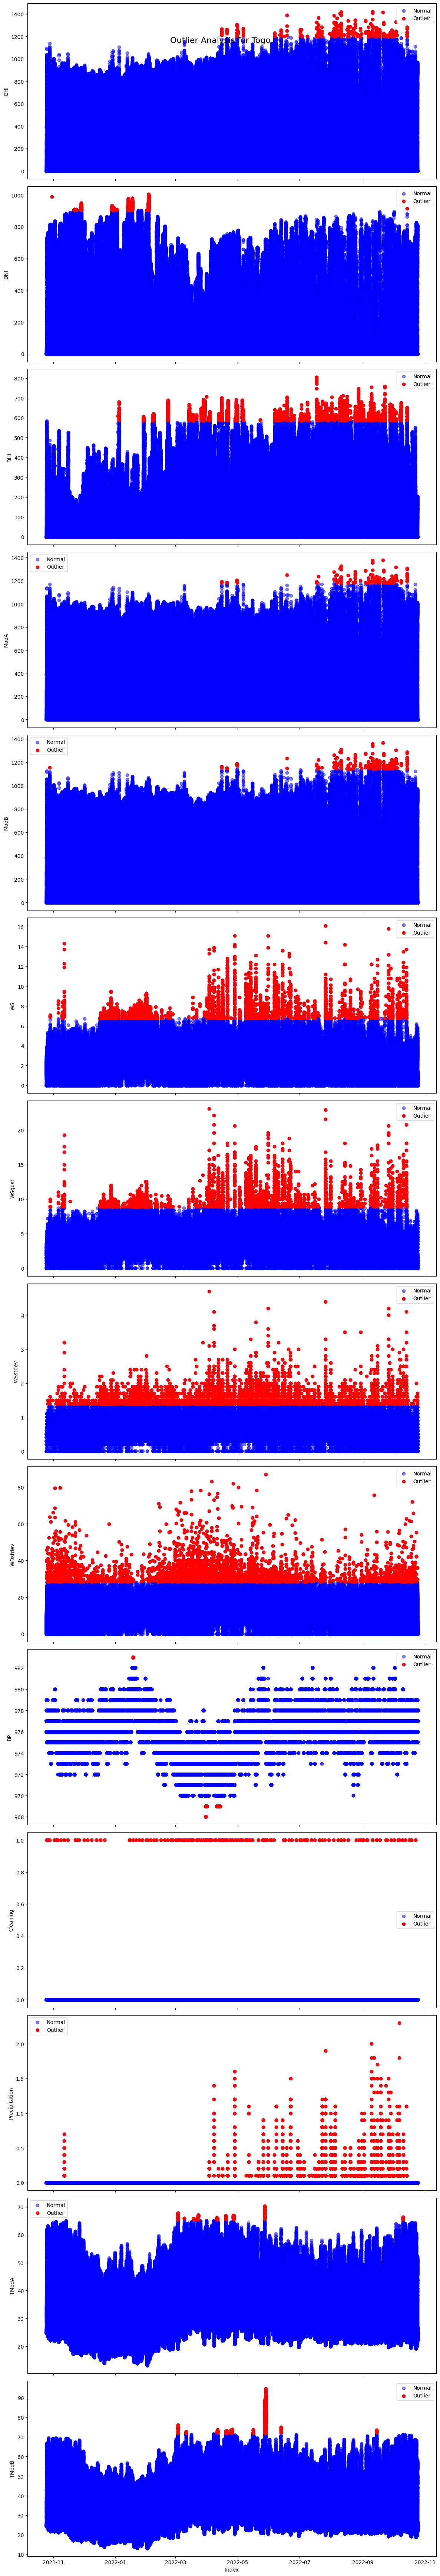

In [20]:
analyze_and_plot_outliers(togo_data, 'Togo')

### Bubble charts 
explore complex relationships between variables, such as GHI vs. Tamb vs. WS

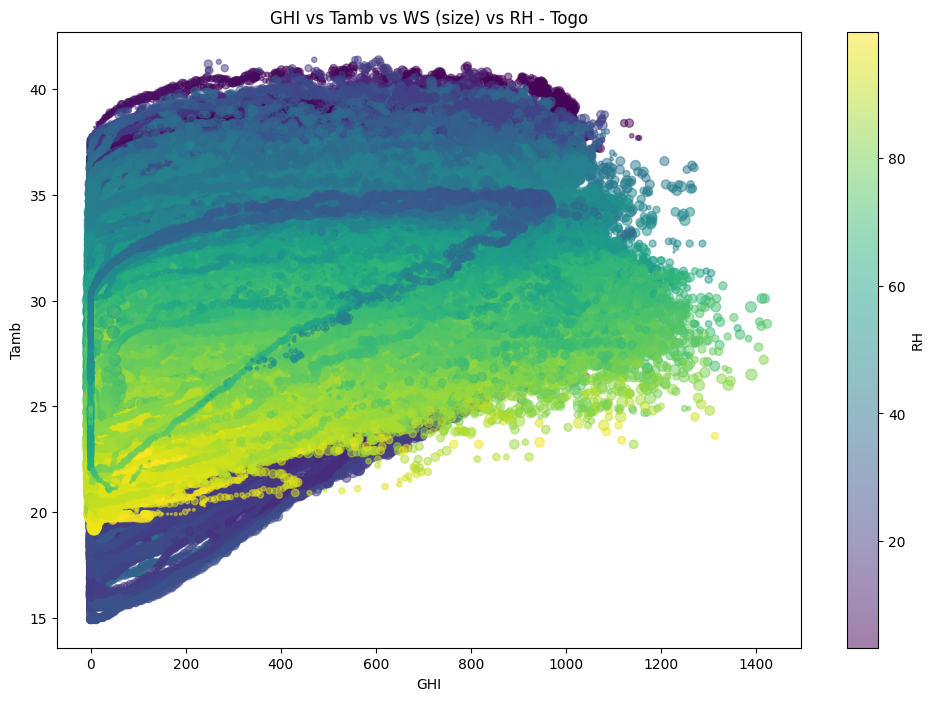

In [21]:
plot_bubble_chart(togo_data, 'Togo')

### Temperature Analysis
Examine how relative humidity (RH) might influence temperature readings and solar radiation


Analyzing humidity impact for Togo


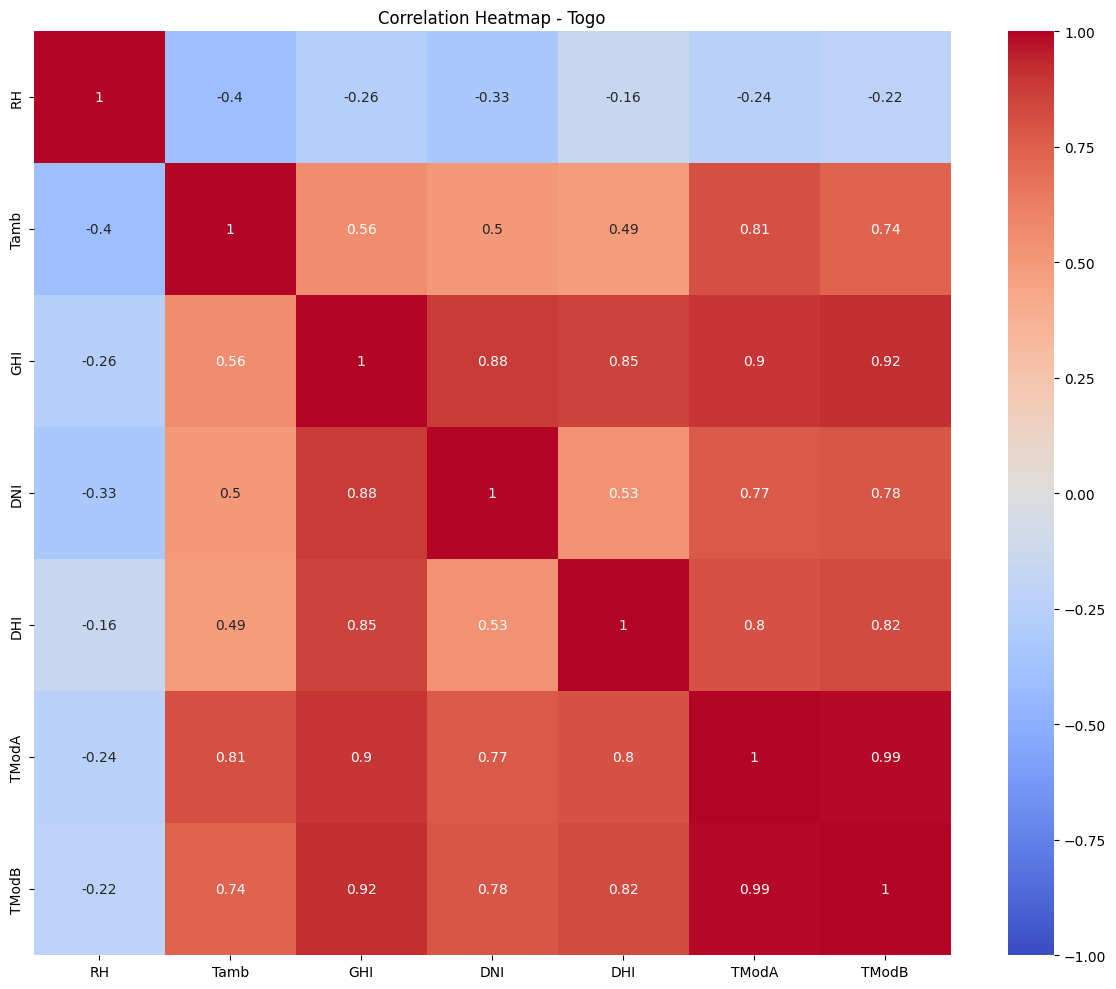

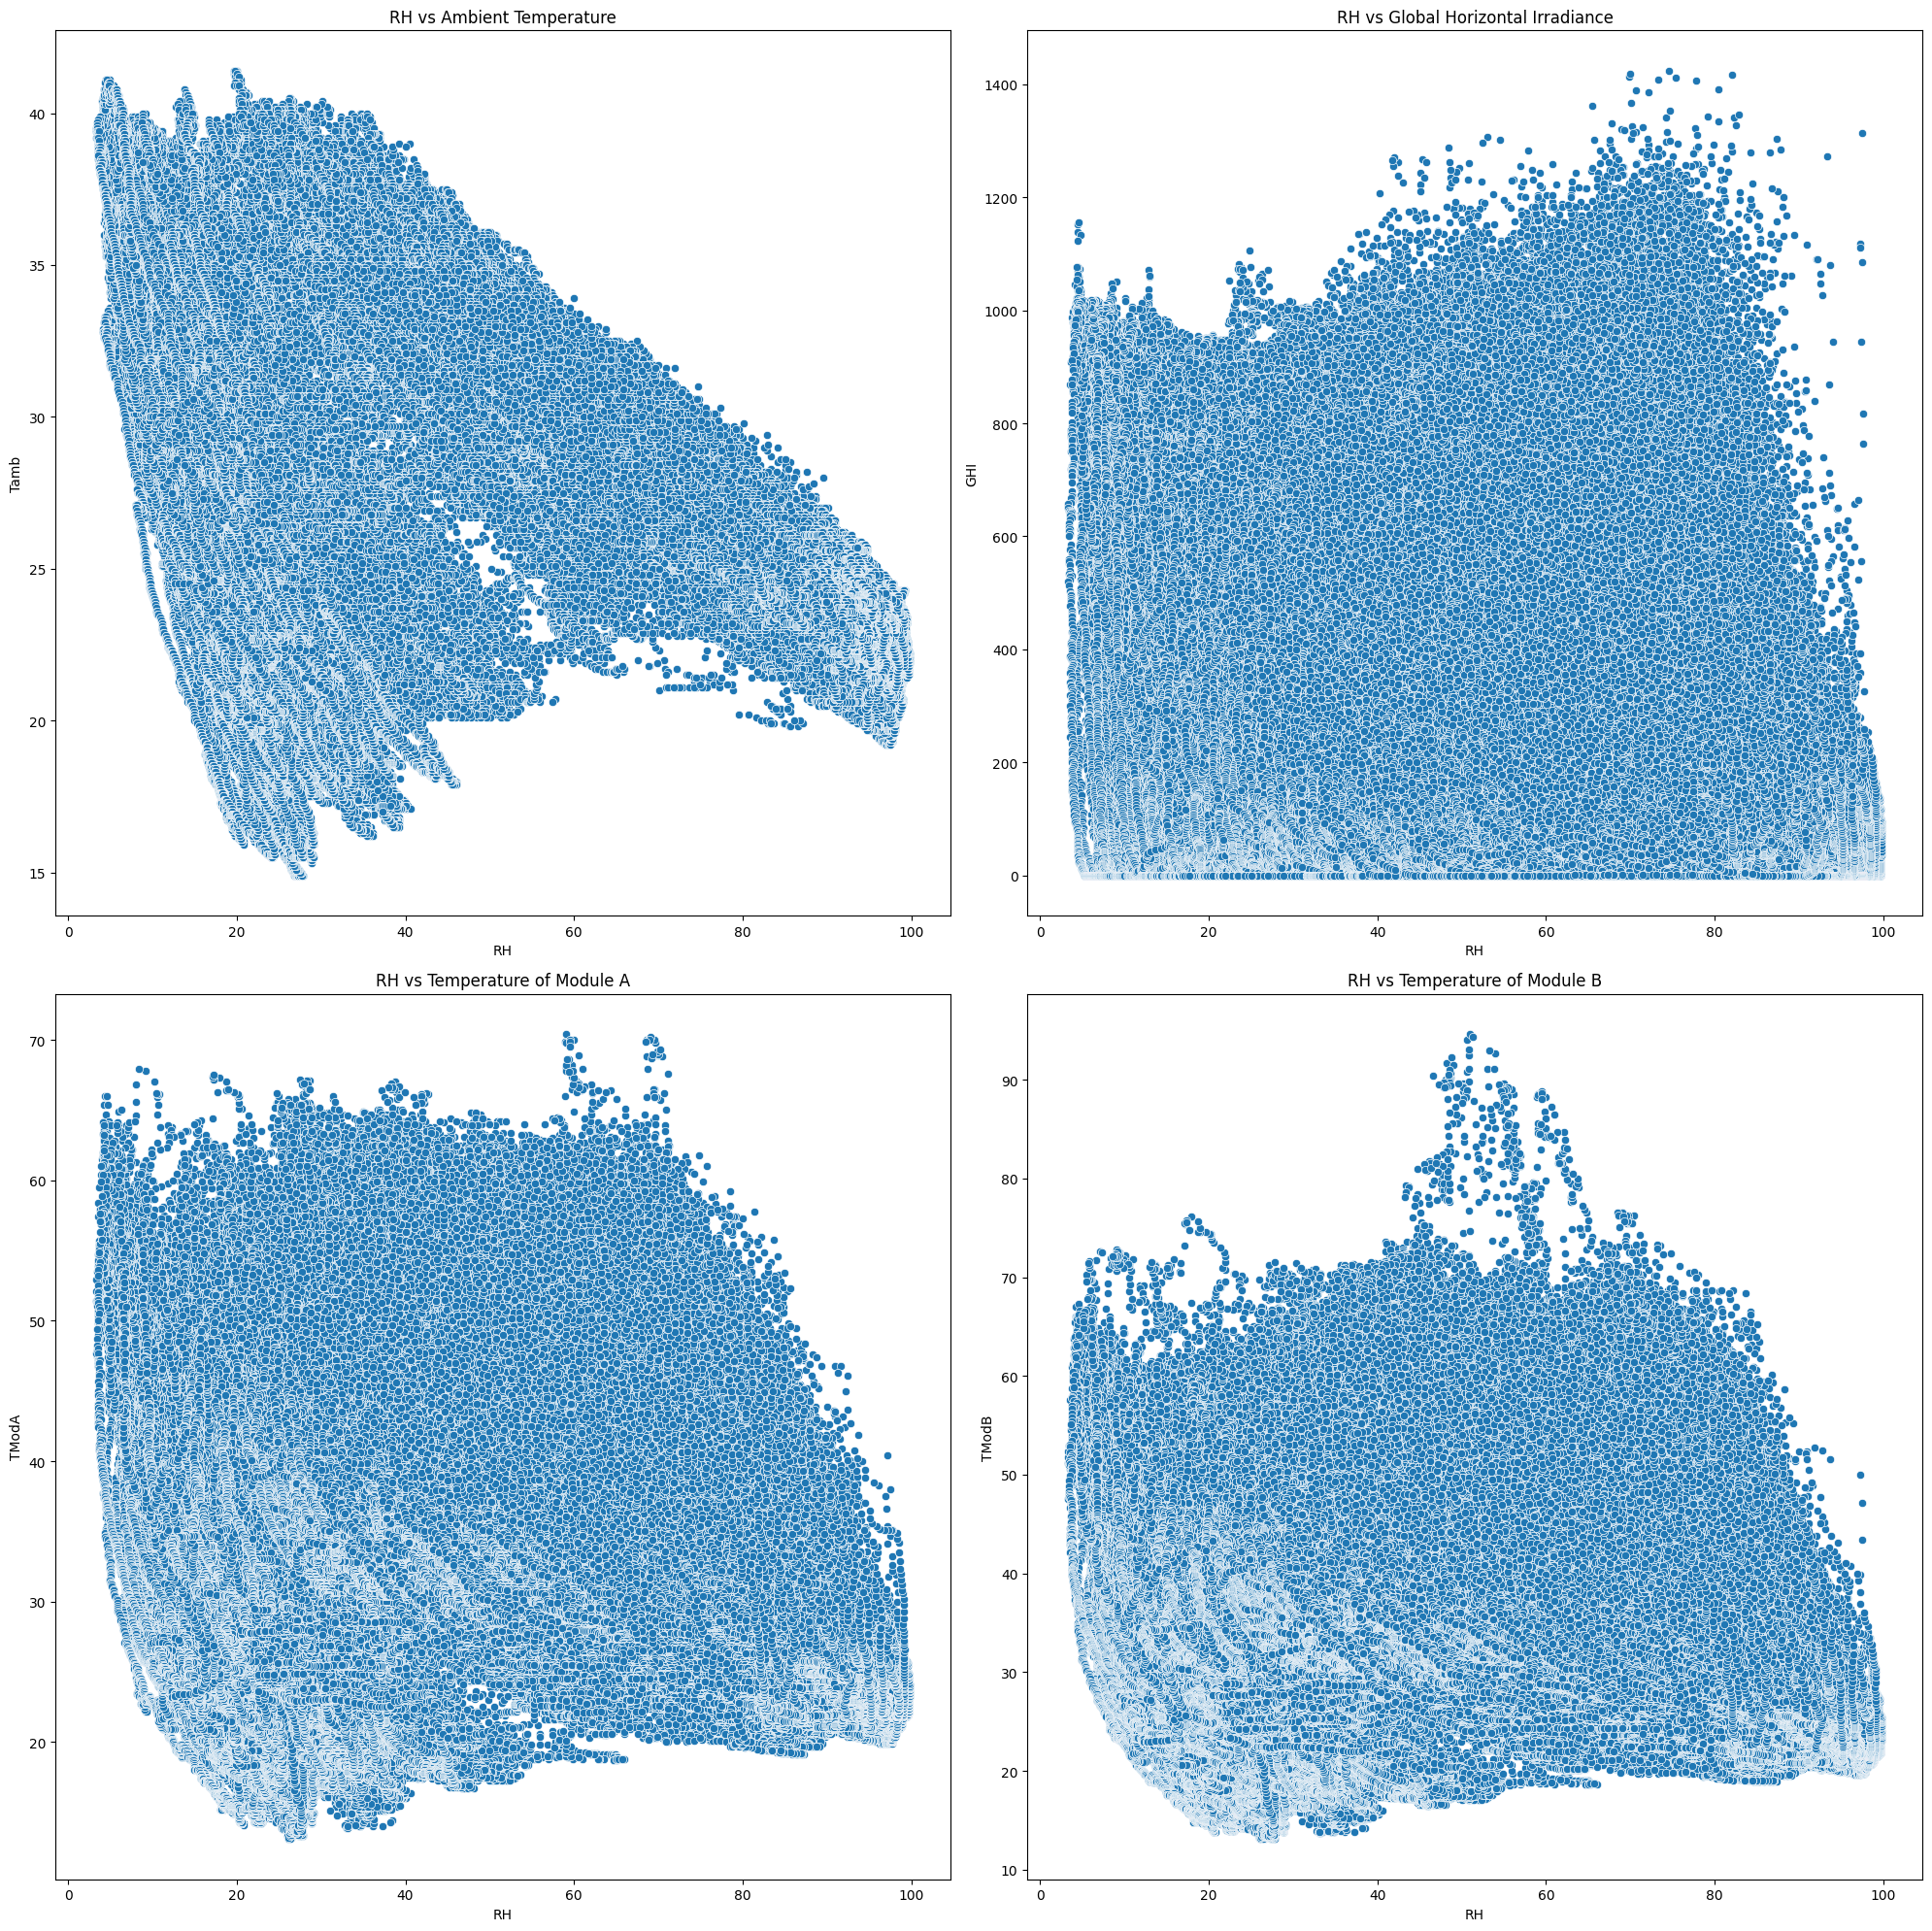

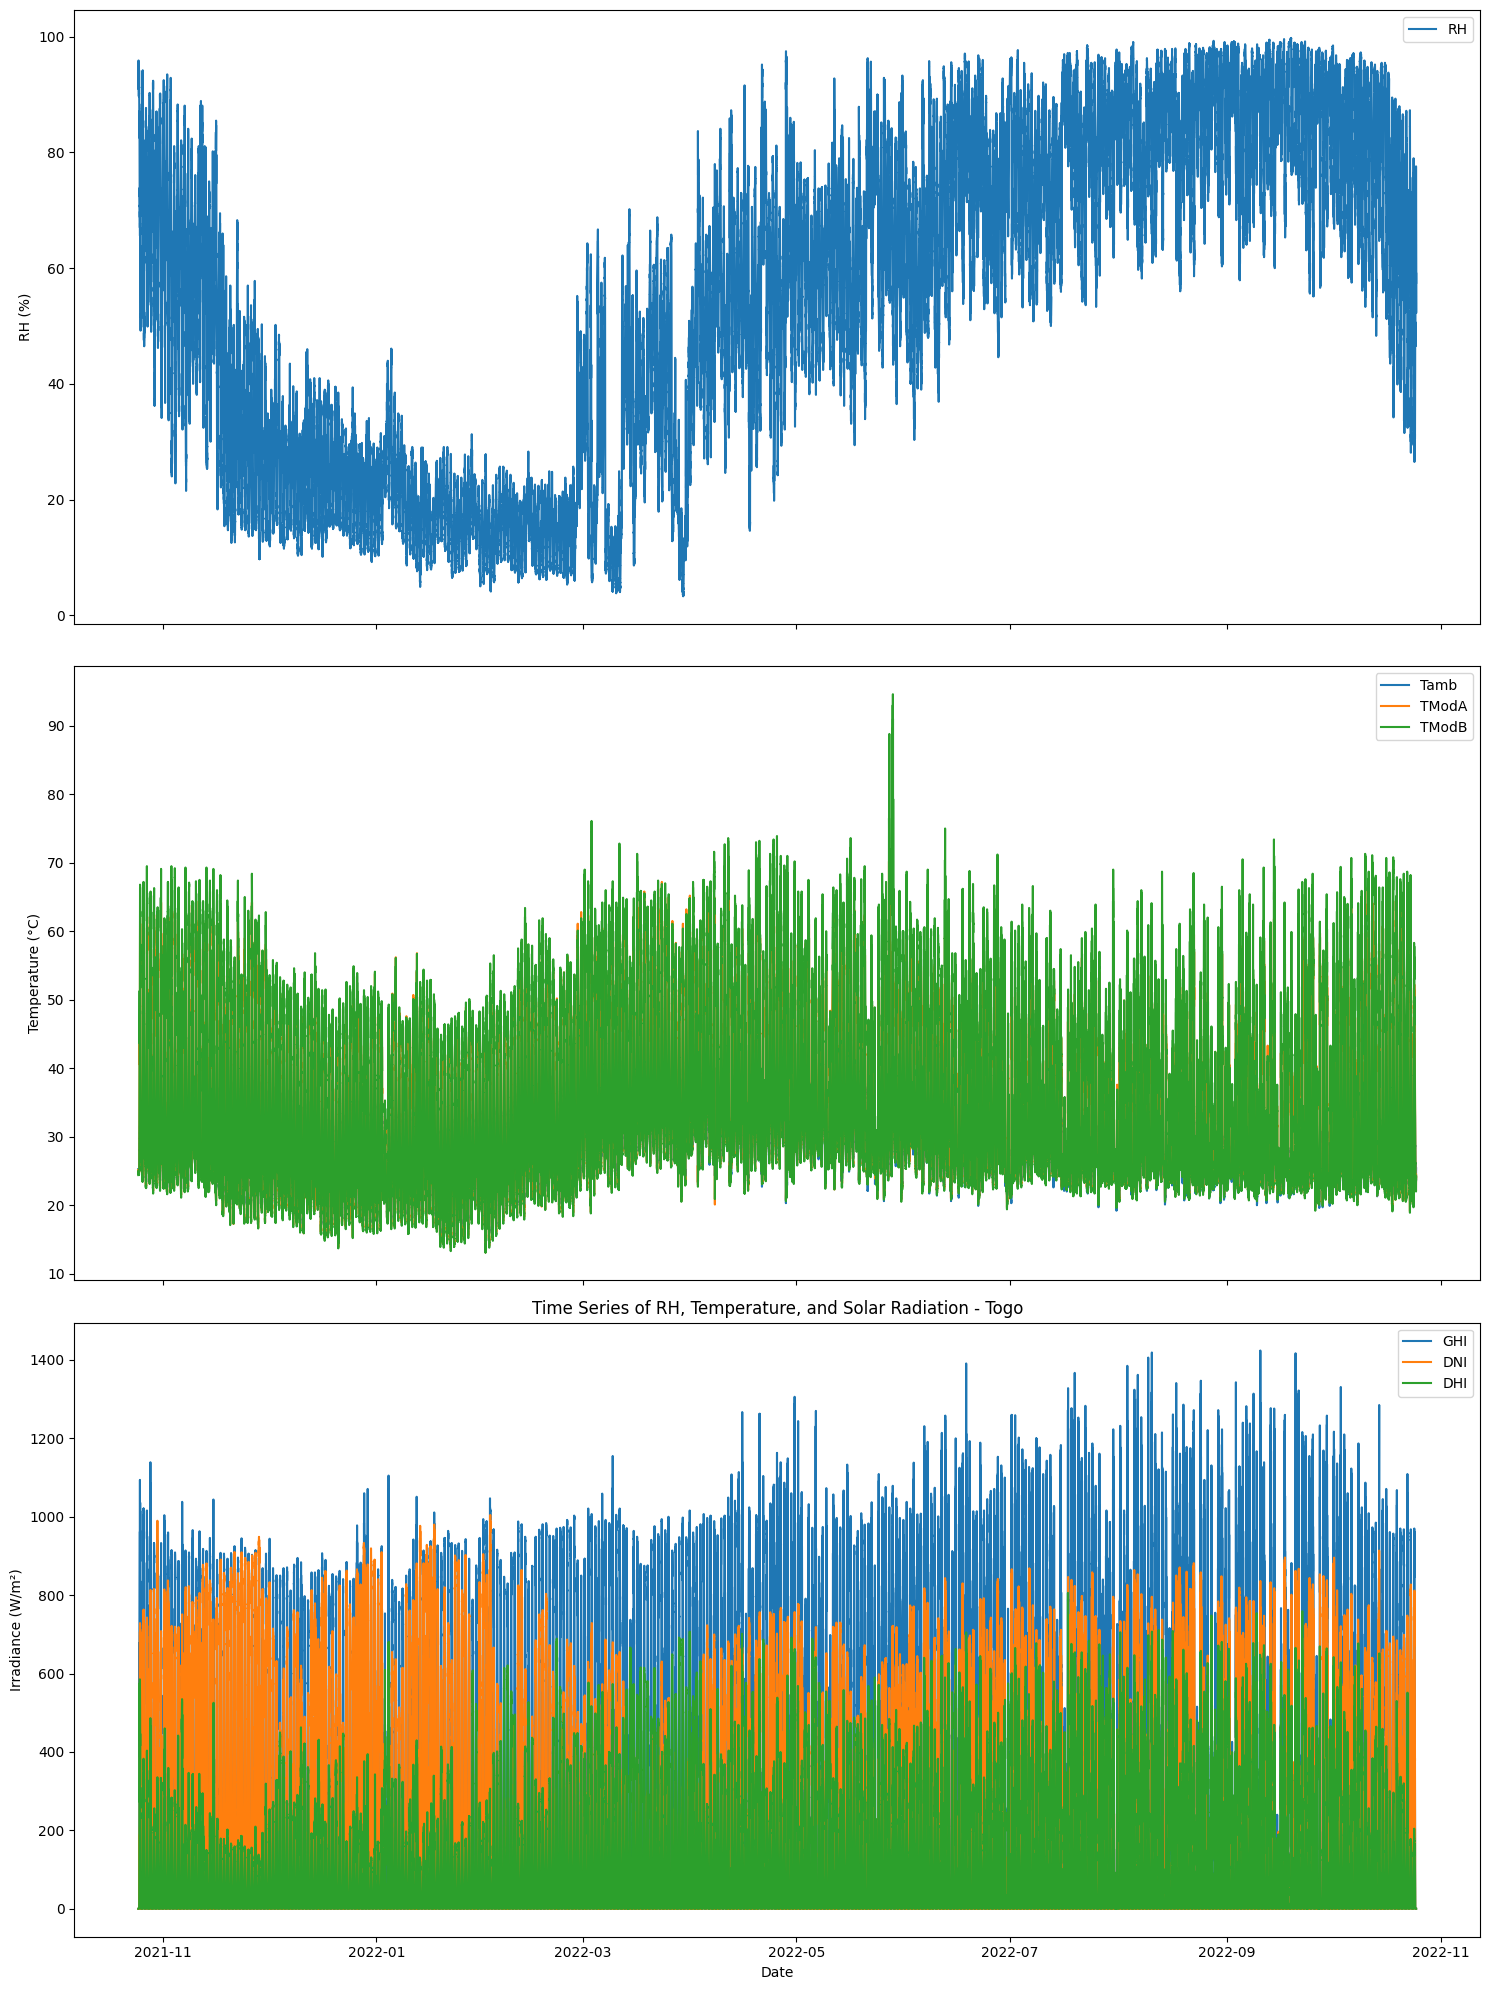

d:\KIFYA AIM\chala\final\MoonLight-Energy-Solutions-\scripts\utils.py:272: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('RH_bins')['Tamb'].mean().plot(kind='bar', ax=axes[0, 0])
d:\KIFYA AIM\chala\final\MoonLight-Energy-Solutions-\scripts\utils.py:277: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('RH_bins')['GHI'].mean().plot(kind='bar', ax=axes[0, 1])
d:\KIFYA AIM\chala\final\MoonLight-Energy-Solutions-\scripts\utils.py:282: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavi

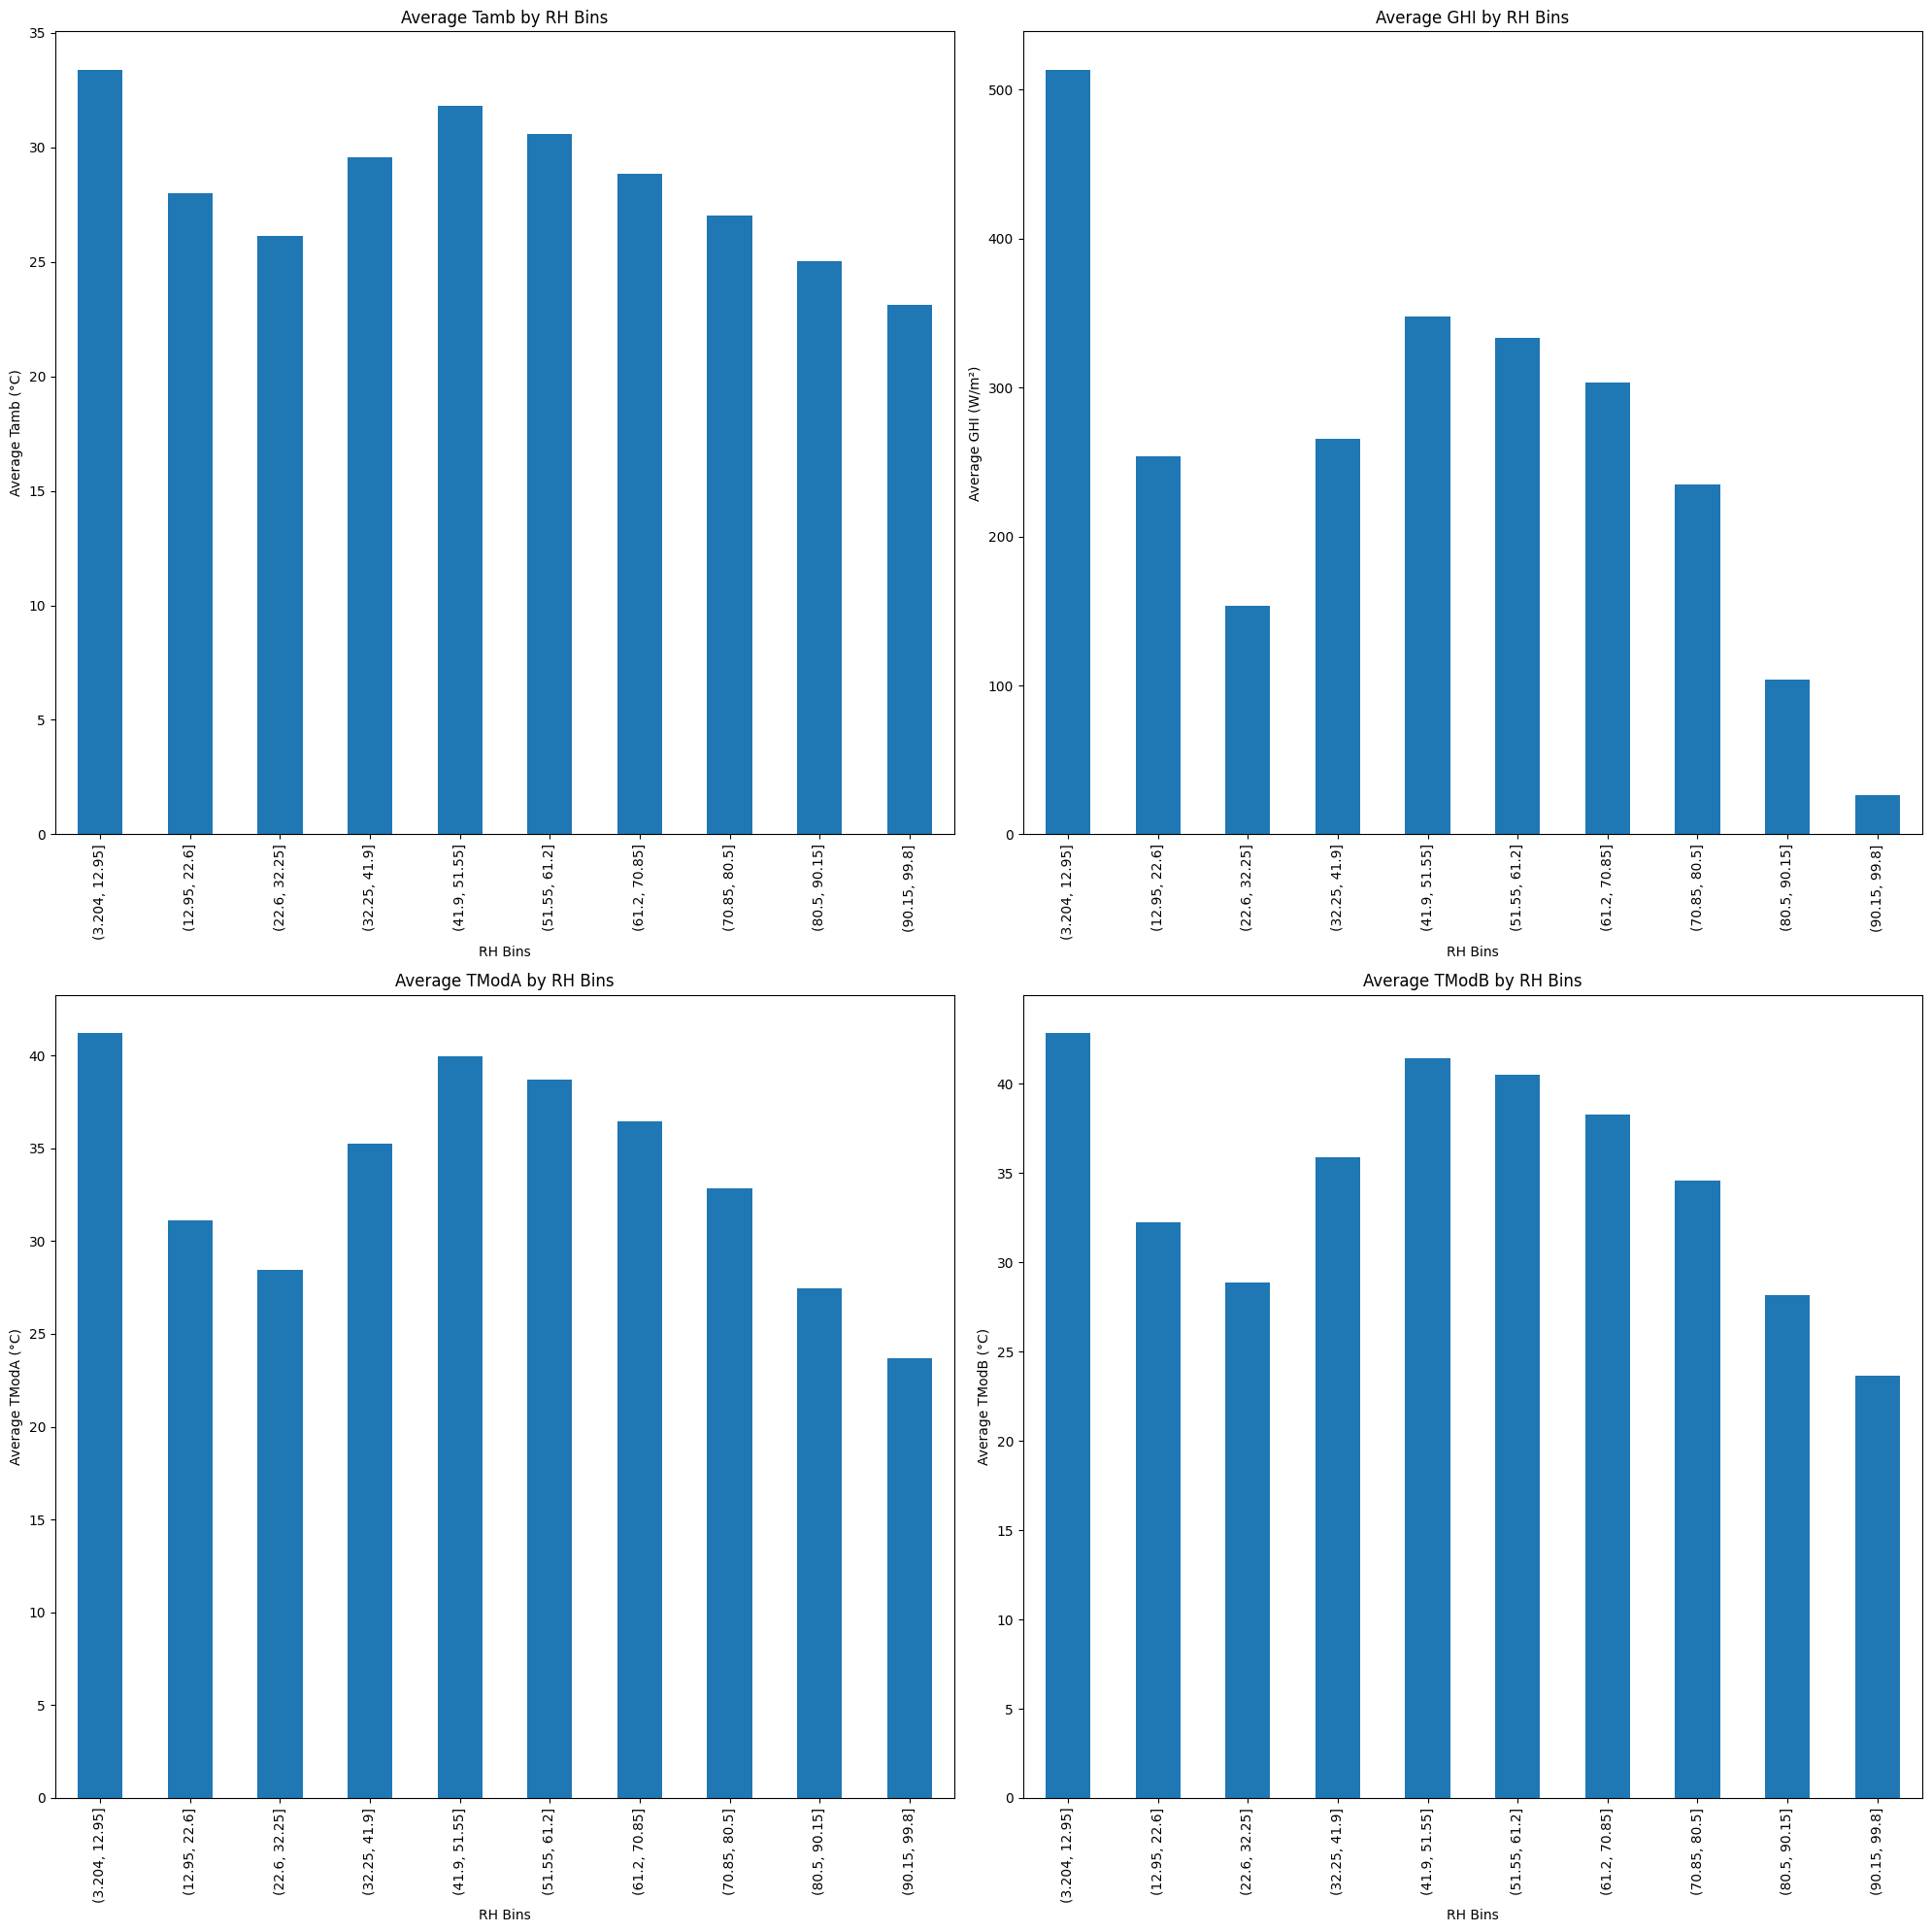

In [22]:
analyze_humidity_impact({'Togo': togo_data})

### drop 'Comments'

In [23]:
cleaned_togo = clean_data({'Togo': dfs['Togo']})
print("\nCleaned dataset for Togo:")
print(cleaned_togo['Togo'].info())
dfs['Togo'] = cleaned_togo['Togo']

Removed 'Comments' column from Togo dataset.

No missing values remain in Togo dataset.

Cleaned dataset for Togo:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-10-25 00:01:00 to 2022-10-25 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   GHI            525600 non-null  float64 
 1   DNI            525600 non-null  float64 
 2   DHI            525600 non-null  float64 
 3   ModA           525600 non-null  float64 
 4   ModB           525600 non-null  float64 
 5   Tamb           525600 non-null  float64 
 6   RH             525600 non-null  float64 
 7   WS             525600 non-null  float64 
 8   WSgust         525600 non-null  float64 
 9   WSstdev        525600 non-null  float64 
 10  WD             525600 non-null  float64 
 11  WDstdev        525600 non-null  float64 
 12  BP             525600 non-null  int64   
 13  Cleaning       525600 non-null  int64   
 14 